In [5]:
import keras #implementing neural networks

``Data``

In [6]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() # collection of 28*28 pixel grayscale images

In [7]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape
# (x, y, z, *c) -> (no. of images, height, width, *channel)

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [8]:
# MANDISH
import pandas as pd

# Flatten the images to 1D arrays (28x28 to 784)
x_train_flat = x_train.reshape(x_train.shape[0], -1)

# Create a pandas DataFrame
df_train = pd.DataFrame(x_train_flat)
df_train['label'] = y_train  # Add labels as a new column

# Display the first few rows
df_train.head()
# 28 * 28 = 784

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [9]:
x_train[0, :, :]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [10]:
y_train[0: 10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [11]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, '5')

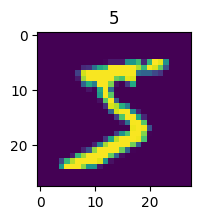

In [12]:
plt.figure(figsize = (2, 2))

plt.imshow(x_train[0, :, :])
plt.title(f"{y_train[0]}")

Normalization

In [13]:
# normalize (0-1)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [14]:
x_train[0, :, :]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [15]:
import numpy as np

In [16]:
arr = np.array(
  [[1, 2, 3],
  [4, 5, 5]]
)
arr.shape

(2, 3)

In [17]:
np.expand_dims(arr, axis=-1)

array([[[1],
        [2],
        [3]],

       [[4],
        [5],
        [5]]])

### Adding channel information

In [18]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [19]:
# value bhayeko thau ma 1 halyo (one-hot encoding)
# One-hot encoding ensures the model treats all classes as distinct categories.
y_train = keras.utils.to_categorical(y_train)

y_test = keras.utils.to_categorical(y_test)

In [20]:
y_train.shape
# (0-9) -> 10 categories

(60000, 10)

### Neural Network Creation

In [21]:
from keras import layers

In [22]:
# dropout -> overfitting protect (Regularization)

In [23]:
model = keras.Sequential() # root node
# Creates a Sequential model, where layers are stacked sequentially.

In [24]:
model.add(layers.Input((28, 28, 1)))
# Specifies the input shape of the model: 28x28x1

model.add(layers.Conv2D(filters=8, kernel_size=(3,3), strides=1, padding="valid", name="1st_conv")) #, activation='relu'
# Applies 8 filters of size 3x3 to extract low-level features like edges.
# strides=1: Filter slides one pixel at a time.
# padding="valid": No padding; output dimensions will shrink.
# Output size: (28−3+1)×(28−3+1)=26×26
model.add(layers.Activation('relu', name="1st_activation"))
model.add(layers.MaxPool2D(pool_size=2, name="1st_maxpool"))
# Reduces the spatial dimensions: Output size: 26/2=13×13.

model.add(layers.Conv2D(filters=16, kernel_size=(3,3), strides=1, padding="valid", name="2nd_conv")) #(13−3+1)×(13−3+1)=11×11
model.add(layers.Activation('relu', name="2nd_activation"))
model.add(layers.MaxPool2D(pool_size=2, name="2nd_maxpool")) # 11/2=5×511/2=5×5

model.add(layers.Flatten()) # higher dimension to lower dimension
#3D feature map (5×5×16) into a 1D vector ( 5 × 5 × 16 = 400 5×5×16=400)
model.add(layers.Dense(128)) # 128 neurons

model.add(layers.Dropout(0.3)) # 30% inactive -> prevent overfitting
model.add(layers.Dense(10, activation='softmax')) # number of output values, softmax-> logits to probabilty (highest)

In [25]:
# compile model
model.compile(
  optimizer ="adam", #dapts the learning rate for each parameter
  loss = "categorical_crossentropy", #one-hot encoded labels
  metrics = ["accuracy"]
)

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ 1st_conv (Conv2D)               │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 1st_activation (Activation)     │ (None, 26, 26, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 1st_maxpool (MaxPooling2D)      │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 2nd_conv (Conv2D)               │ (None, 11, 11, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 2nd_activation (Activation)     │ (None, 11, 11, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 2nd_maxpool (MaxPooling2D)      │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        51,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,866 (210.41 KB)

 Trainable params: 53,866 (210.41 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# None -> send dynamic value (batch dimension)
# Param # -> number of parameters to optimize
# Param # -> refers to the number of trainable parameters (weights and biases) in a layer

# (3×3×1+1)×8	= 80
# (3×3×8+1)×16 = 1,168
# (400+1)×128	= 51,328
# (128+1)×10 = 1,290

In [28]:
from keras.callbacks import EarlyStopping
early_stopping_cb = EarlyStopping(
  monitor='val_accuracy',
  patience=3, 
  restore_best_weights=True
)

In [29]:
history = model.fit(
  x_train, 
  y_train, 
  batch_size=128, 
  epochs=25, 
  validation_split=0.1,
  callbacks=[early_stopping_cb]
  # validation_data(x_val, y_val)
) 

Epoch 1/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.7957 - loss: 0.6874 - val_accuracy: 0.9738 - val_loss: 0.0890
Epoch 2/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9622 - loss: 0.1226 - val_accuracy: 0.9820 - val_loss: 0.0673
Epoch 3/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9723 - loss: 0.0918 - val_accuracy: 0.9807 - val_loss: 0.0680
Epoch 4/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9762 - loss: 0.0765 - val_accuracy: 0.9828 - val_loss: 0.0599
Epoch 5/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9790 - loss: 0.0667 - val_accuracy: 0.9842 - val_loss: 0.0538
Epoch 6/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9833 - loss: 0.0559 - val_accuracy: 0.9865 - val_loss: 0.0470
Epoch 7/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9845 - loss: 0.0499 - val_accuracy: 0.9863 - val_loss: 0.0480
Epoch 8/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9839 - loss: 0.0498 - val_acc

In [30]:
# if weight value is same then calculation will also be the same

In [31]:
model.save("model.keras")

In [32]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [33]:
history.history['accuracy']

[0.9010000228881836,
 0.9646852016448975,
 0.9728888869285583,
 0.977148175239563,
 0.9799073934555054,
 0.9823148250579834,
 0.9834444522857666,
 0.9838333129882812,
 0.9860555529594421,
 0.9865555763244629,
 0.9872778058052063,
 0.9880740642547607,
 0.9884259104728699,
 0.9891481399536133,
 0.9899073839187622,
 0.9902222156524658]

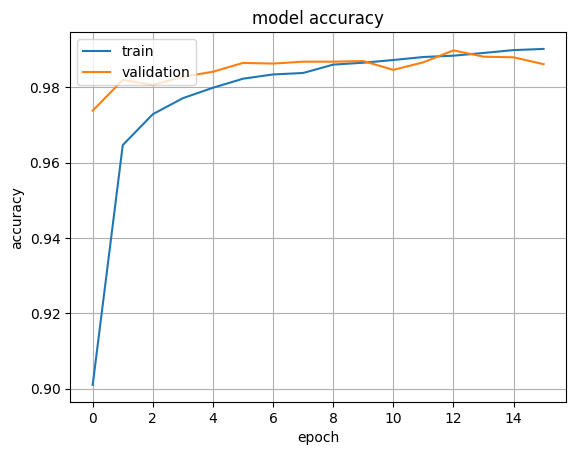

In [34]:
import matplotlib.pyplot as plt

#summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid()
plt.show()

In [35]:
# saturation point -> point from where model accuracy cannot be increased
# after that -> over-fitting
# each epoch -> model store
  # - disk storage consumption high
  # 7 billion data = 4.3GB

# use checkpoint/ early stopping
  
# generally: (5-15 epoch)
# 5 epoch samma accuracy not improve -> stop

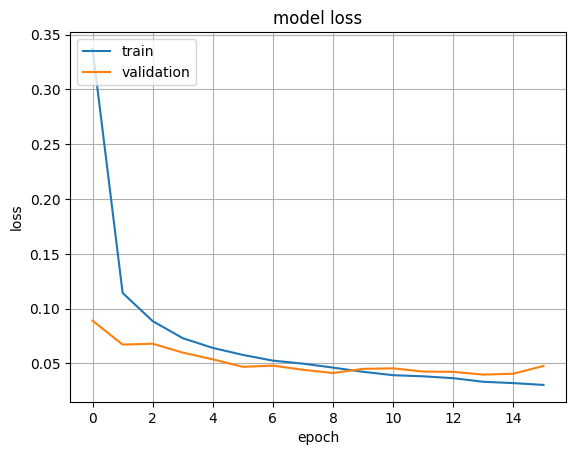

In [36]:
import matplotlib.pyplot as plt

#summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid()
plt.show()

In [ ]:
loaded_model = keras.saving.load_model("model.keras")

In [ ]:
loaded_model_preds = loaded_model.predict(x_test)

In [37]:
preds = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [38]:
preds[0], max(preds[0])

(array([1.3300075e-11, 1.8753090e-09, 5.3300575e-08, 3.8542859e-07,
        3.0893888e-11, 1.2042650e-10, 7.8950014e-16, 9.9999952e-01,
        4.9251503e-10, 6.6675618e-08], dtype=float32),
 np.float32(0.9999995))

In [39]:
np.argmax(preds[0]) # find max index

np.int64(7)

In [ ]:
loaded_model_preds[0], np.argmax(loaded_model_preds[0])

In [40]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [41]:
np.argmax(y_test[0]) # since same -> accurately predicted

np.int64(7)

In [42]:
model.evaluate(x_test, y_test) 

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9838 - loss: 0.0489


[0.039588361978530884, 0.9873999953269958]

In [43]:
# sequential method 2
model2 = keras.Sequential([
  layers.Input((28, 28, 1)),

  layers.Conv2D(filters=8, kernel_size=(3,3), strides=1, padding="valid", name="1st_conv"), 
  layers.Activation('relu', name="1st_activation"),
  layers.MaxPool2D(pool_size=2, name="1st_maxpool"),

  layers.Conv2D(filters=16, kernel_size=(3,3), strides=1, padding="valid", name="2nd_conv"), 
  layers.Activation('relu', name="2nd_activation"),
  layers.MaxPool2D(pool_size=2, name="2nd_maxpool"), 
  layers.Flatten(), 
  layers.Dense(128), 

  layers.Dropout(0.3), 
  layers.Dense(10, activation='softmax') 
])
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ 1st_conv (Conv2D)               │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 1st_activation (Activation)     │ (None, 26, 26, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 1st_maxpool (MaxPooling2D)      │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 2nd_conv (Conv2D)               │ (None, 11, 11, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 2nd_activation (Activation)     │ (None, 11, 11, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 2nd_maxpool (MaxPooling2D)      │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        51,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,866 (210.41 KB)

 Trainable params: 53,866 (210.41 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
# remove later
import keras 
from keras import layers

In [45]:
# functional model
input_data = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=8, kernel_size=(3,3), strides=1, padding="valid", name="1st_conv")(input_data)
x = layers.Activation('relu', name="1st_activation")(x)
x = layers.MaxPool2D(pool_size=2, name="1st_maxpool")(x)
x = layers.Conv2D(filters=16, kernel_size=(3,3), strides=1, padding="valid", name="2nd_conv")(x)
x = layers.Activation('relu', name="2nd_activation")(x)
x = layers.MaxPool2D(pool_size=2, name="2nd_maxpool")(x)
x = layers.Flatten()(x)
x = layers.Dense(128)(x)
x = layers.Dropout(0.3)(x)
output = layers.Dense(10, activation='softmax')(x)

func_model = keras.Model(inputs=input_data, outputs=output, name="functional model")

In [46]:
! pip install pydot
! pip install graphviz

In [47]:
keras.utils.plot_model(func_model)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.
